<a href="https://colab.research.google.com/github/SeanPatrickHurley/MLE_S25/blob/main/HW2_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing data we want


In [13]:
from sklearn import datasets

iris = datasets.load_iris()

print(iris.feature_names)

print(iris.target_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


# Now, we define new targets to classify the flowers.
For simplicity, we define modified areas for the sepals and petals of the flowers.
Modified, because the sepals and petals are not perfect rectangles.

In [14]:
sepal_area_mod = (iris.data[:, 0] * iris.data[:, 1])
petal_area_mod = (iris.data[:, 2] * iris.data[:, 3])

print(sepal_area_mod.shape)
print(petal_area_mod.shape)

import numpy as np

new_data = np.vstack((sepal_area_mod, petal_area_mod)).T

(150,)
(150,)


This is just a plot to show the data

['modified sepal area', 'modified petal area']


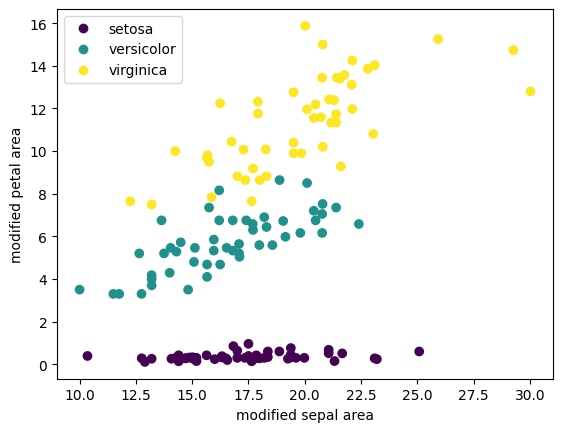

In [27]:
X = new_data
y = iris.target
label_names = ['modified sepal area','modified petal area']

import matplotlib.pyplot as plt
plot = plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel(label_names[0])
plt.ylabel(label_names[1])
plt.legend(handles=plot.legend_elements()[0], labels=iris.target_names.tolist())

print(label_names)

#Now we will train our data

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.95


Now, we will plot our code side by side

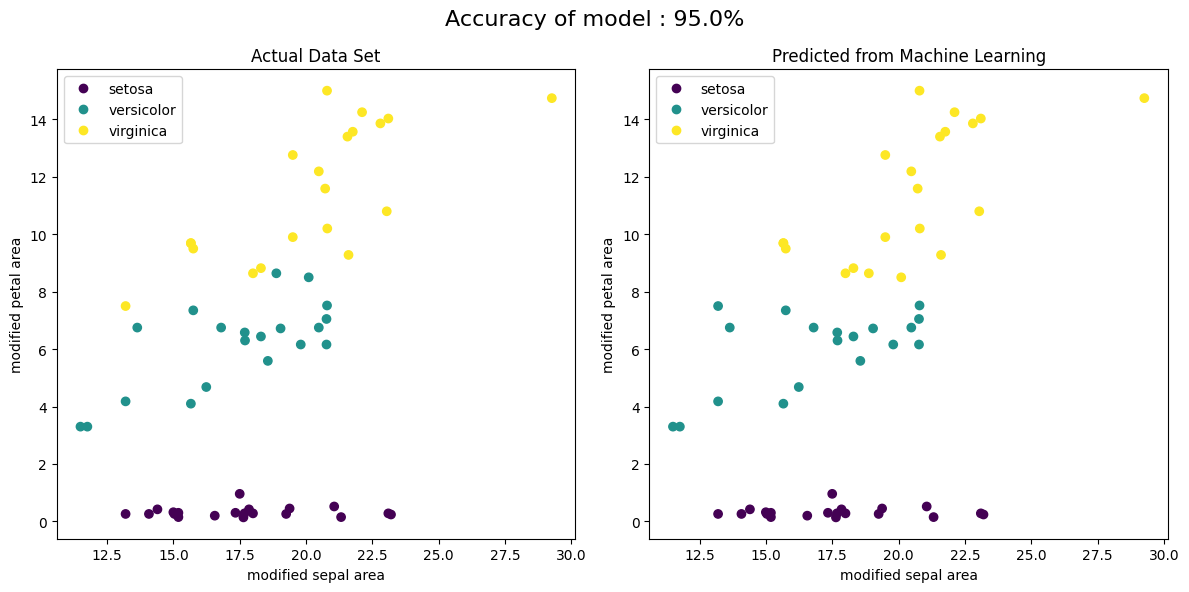

In [36]:
import matplotlib.pyplot as plt

# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) # Adjust figsize as needed

# Plot for actual values (left subplot)
plot1 = ax1.scatter(X_test[:,0], X_test[:,1], c=y_test)
ax1.set_xlabel(label_names[0])
ax1.set_ylabel(label_names[1])
ax1.set_title('Actual Data Set')
ax1.legend(handles=plot.legend_elements()[0], labels=iris.target_names.tolist())

# Plot for predicted values (right subplot)
plot2 = ax2.scatter(X_test[:,0], X_test[:,1], c=preds)
ax2.set_xlabel(label_names[0])
ax2.set_ylabel(label_names[1])
ax2.set_title('Predicted from Machine Learning')
ax2.legend(handles=plot.legend_elements()[0], labels=iris.target_names.tolist())

fig.suptitle(f"Accuracy of model : {acc*100}%", fontsize=16)

# Adjust layout and display the plots
plt.tight_layout()  # Prevents overlapping elements
plt.show()